#### Install ggplot for python

follow the instruction note at [here](http://ggplot.yhathq.com/install.html). The diamonds dataset will be loaded.

#### What is diamonds dataset?

In [2]:
from ggplot import *
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The diamond dataset contains the prices and other attributes of almost 54,000 diamonds. The variables are as follows:

1. price. price in US dollars (\$326--\$18,823)

2. carat. weight of the diamond (0.2--5.01)

3. cut. quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4. colour. diamond colour, from J (worst) to D (best)

5. clarity. a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best))

6. x. length in mm (0--10.74)

7. y. width in mm (0--58.9)

8. z. depth in mm (0--31.8)

9. depth. total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

10. table. width of top of diamond relative to widest point (43--95)

#### Single varible distribution

Do a quick histogram plot:

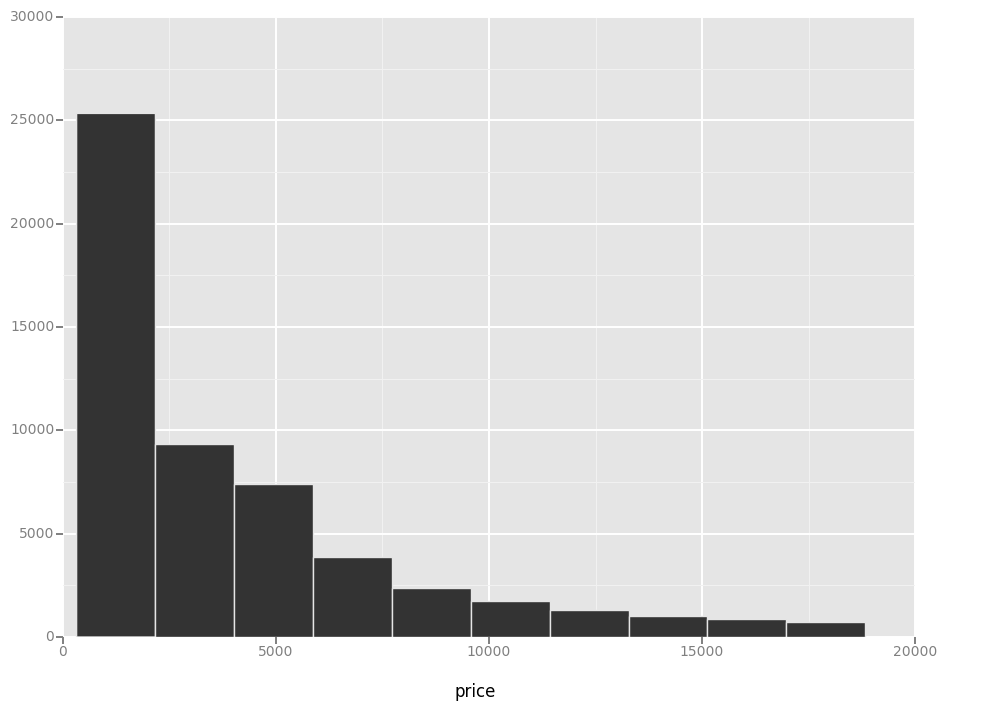

<ggplot: (-9223371929903635982)>

In [7]:
ggplot(aes(x='price'), data=diamonds) + \
    geom_histogram()

The price distribution is long-tail. Try a smaller binwidth:

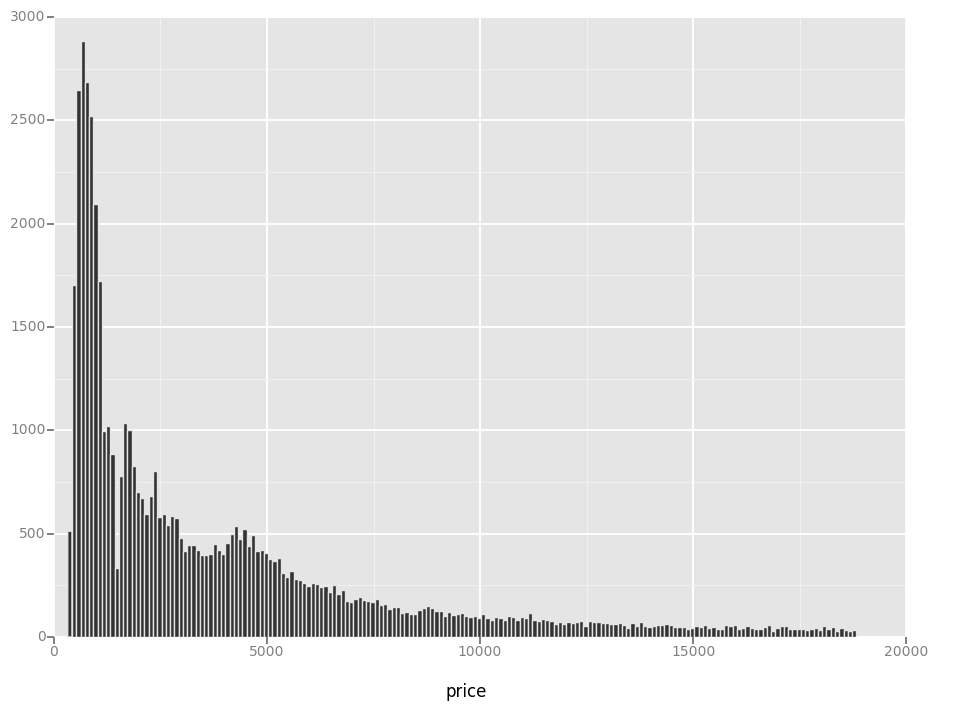

<ggplot: (-9223371929900586580)>

In [10]:
ggplot(aes(x='price'), data=diamonds) + \
    geom_histogram(binwidth = 100)

log() the price for a more normal distribution. The data show some trend of bimodality on the log10 scale, consistent with our two-class, "rich-buyer, poor-buyer" speculation about the nature of customers for diamonds.

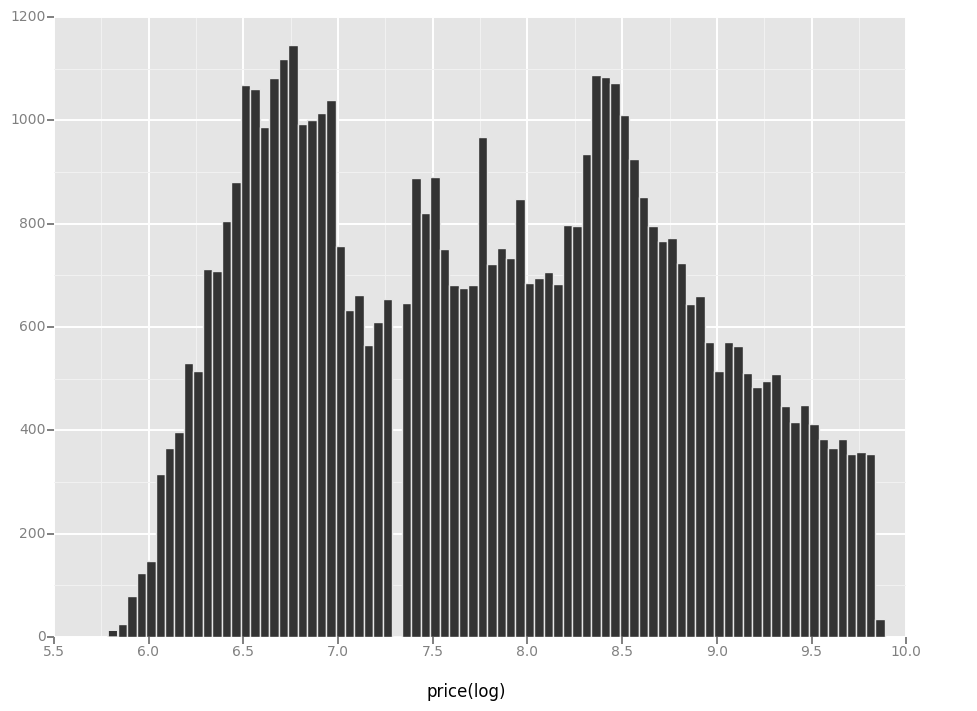

<ggplot: (177689010166)>

In [3]:
import math
import numpy as np
diamonds['pricelog'] = np.log(diamonds['price'])

ggplot(aes(x='pricelog'), data=diamonds) + \
    geom_histogram(binwidth = 0.05)+ xlab('price(log)')

See other variable distributions.

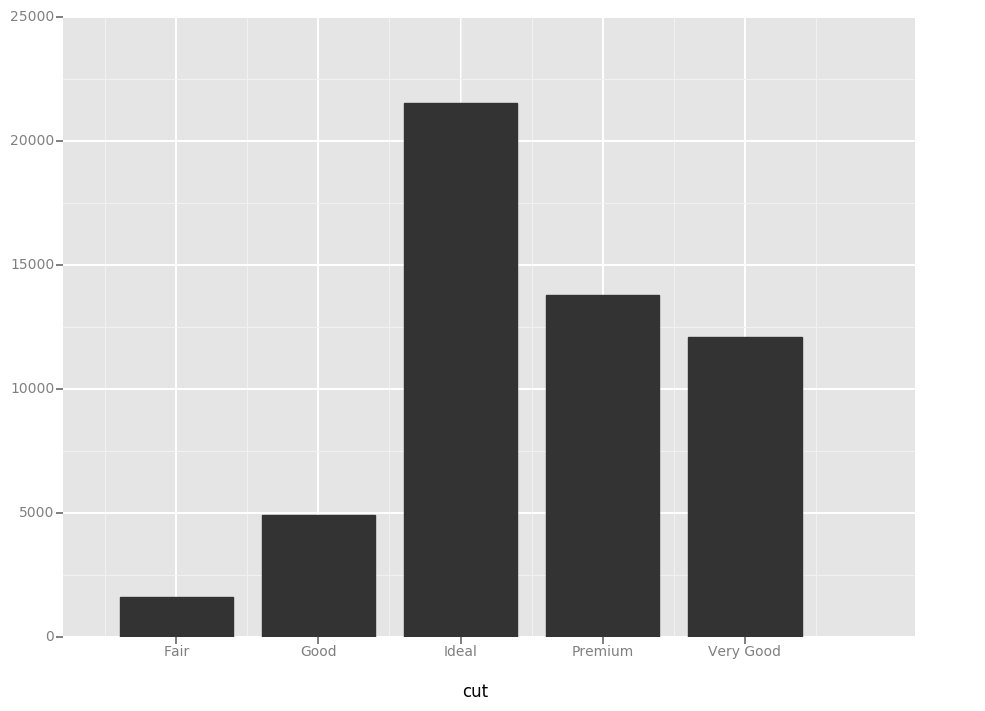

<ggplot: (-9223371894201501380)>

In [3]:
ggplot(aes(x='factor(cut)'), data=diamonds) + \
     geom_bar(labels=["Fair", "Good", "Very Good","Premium","Ideal"]) + xlab('cut')
# in future version of ggplot for python labels should work to reorder the label

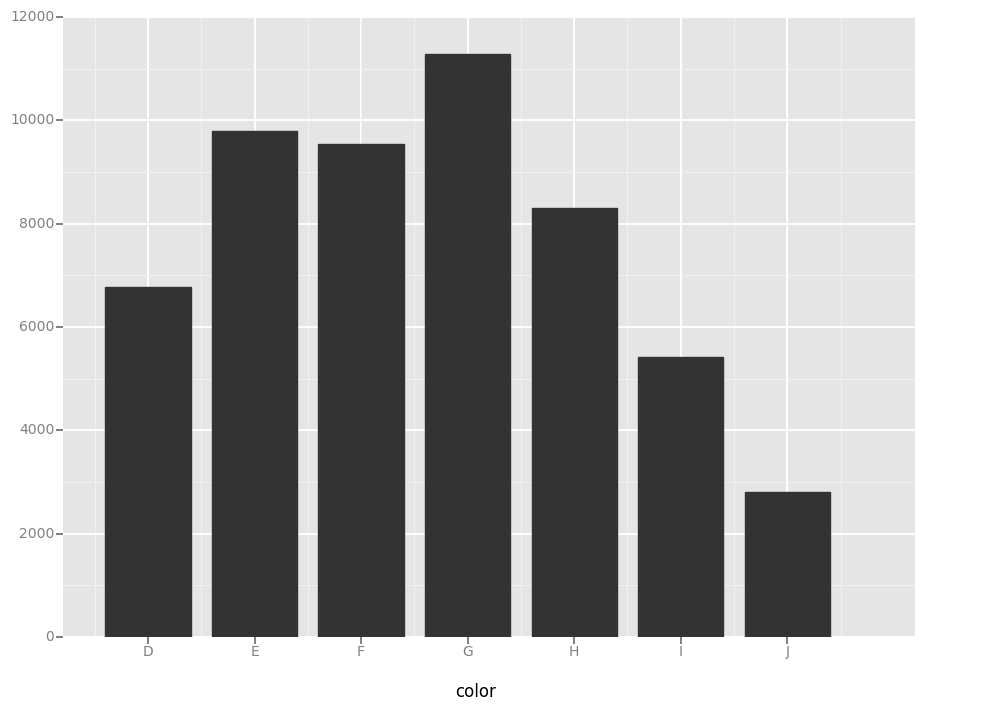

<ggplot: (-9223371894201506935)>

In [4]:
ggplot(aes(x='factor(color)'), data=diamonds) + \
     geom_bar() + xlab('color')

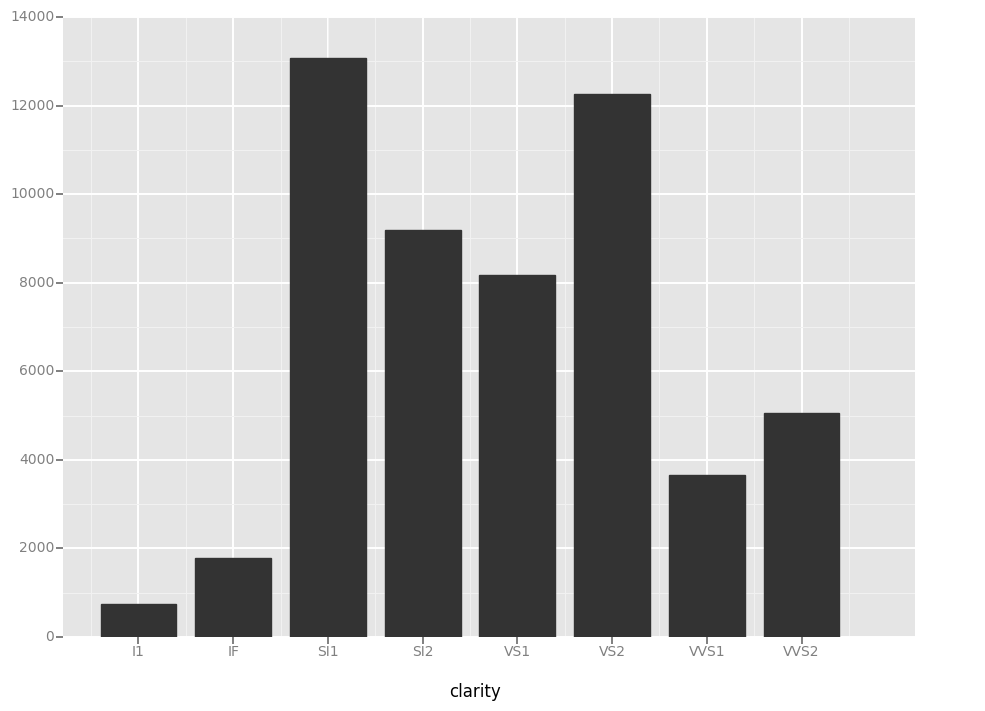

<ggplot: (142654023656)>

In [5]:
ggplot(aes(x='factor(clarity)'), data=diamonds) + \
     geom_bar() + xlab('clarity')

Most diamonds are of ideal cut, with gradually fewer diamonds of lesser-quality cut. A majority of diamonds are of cut G or better (lower letters are of better color). Clarity is skewed to the right, with most diamonds of lower clarity VS2 or worse.

#### Plot each varible pairs for a general idea.

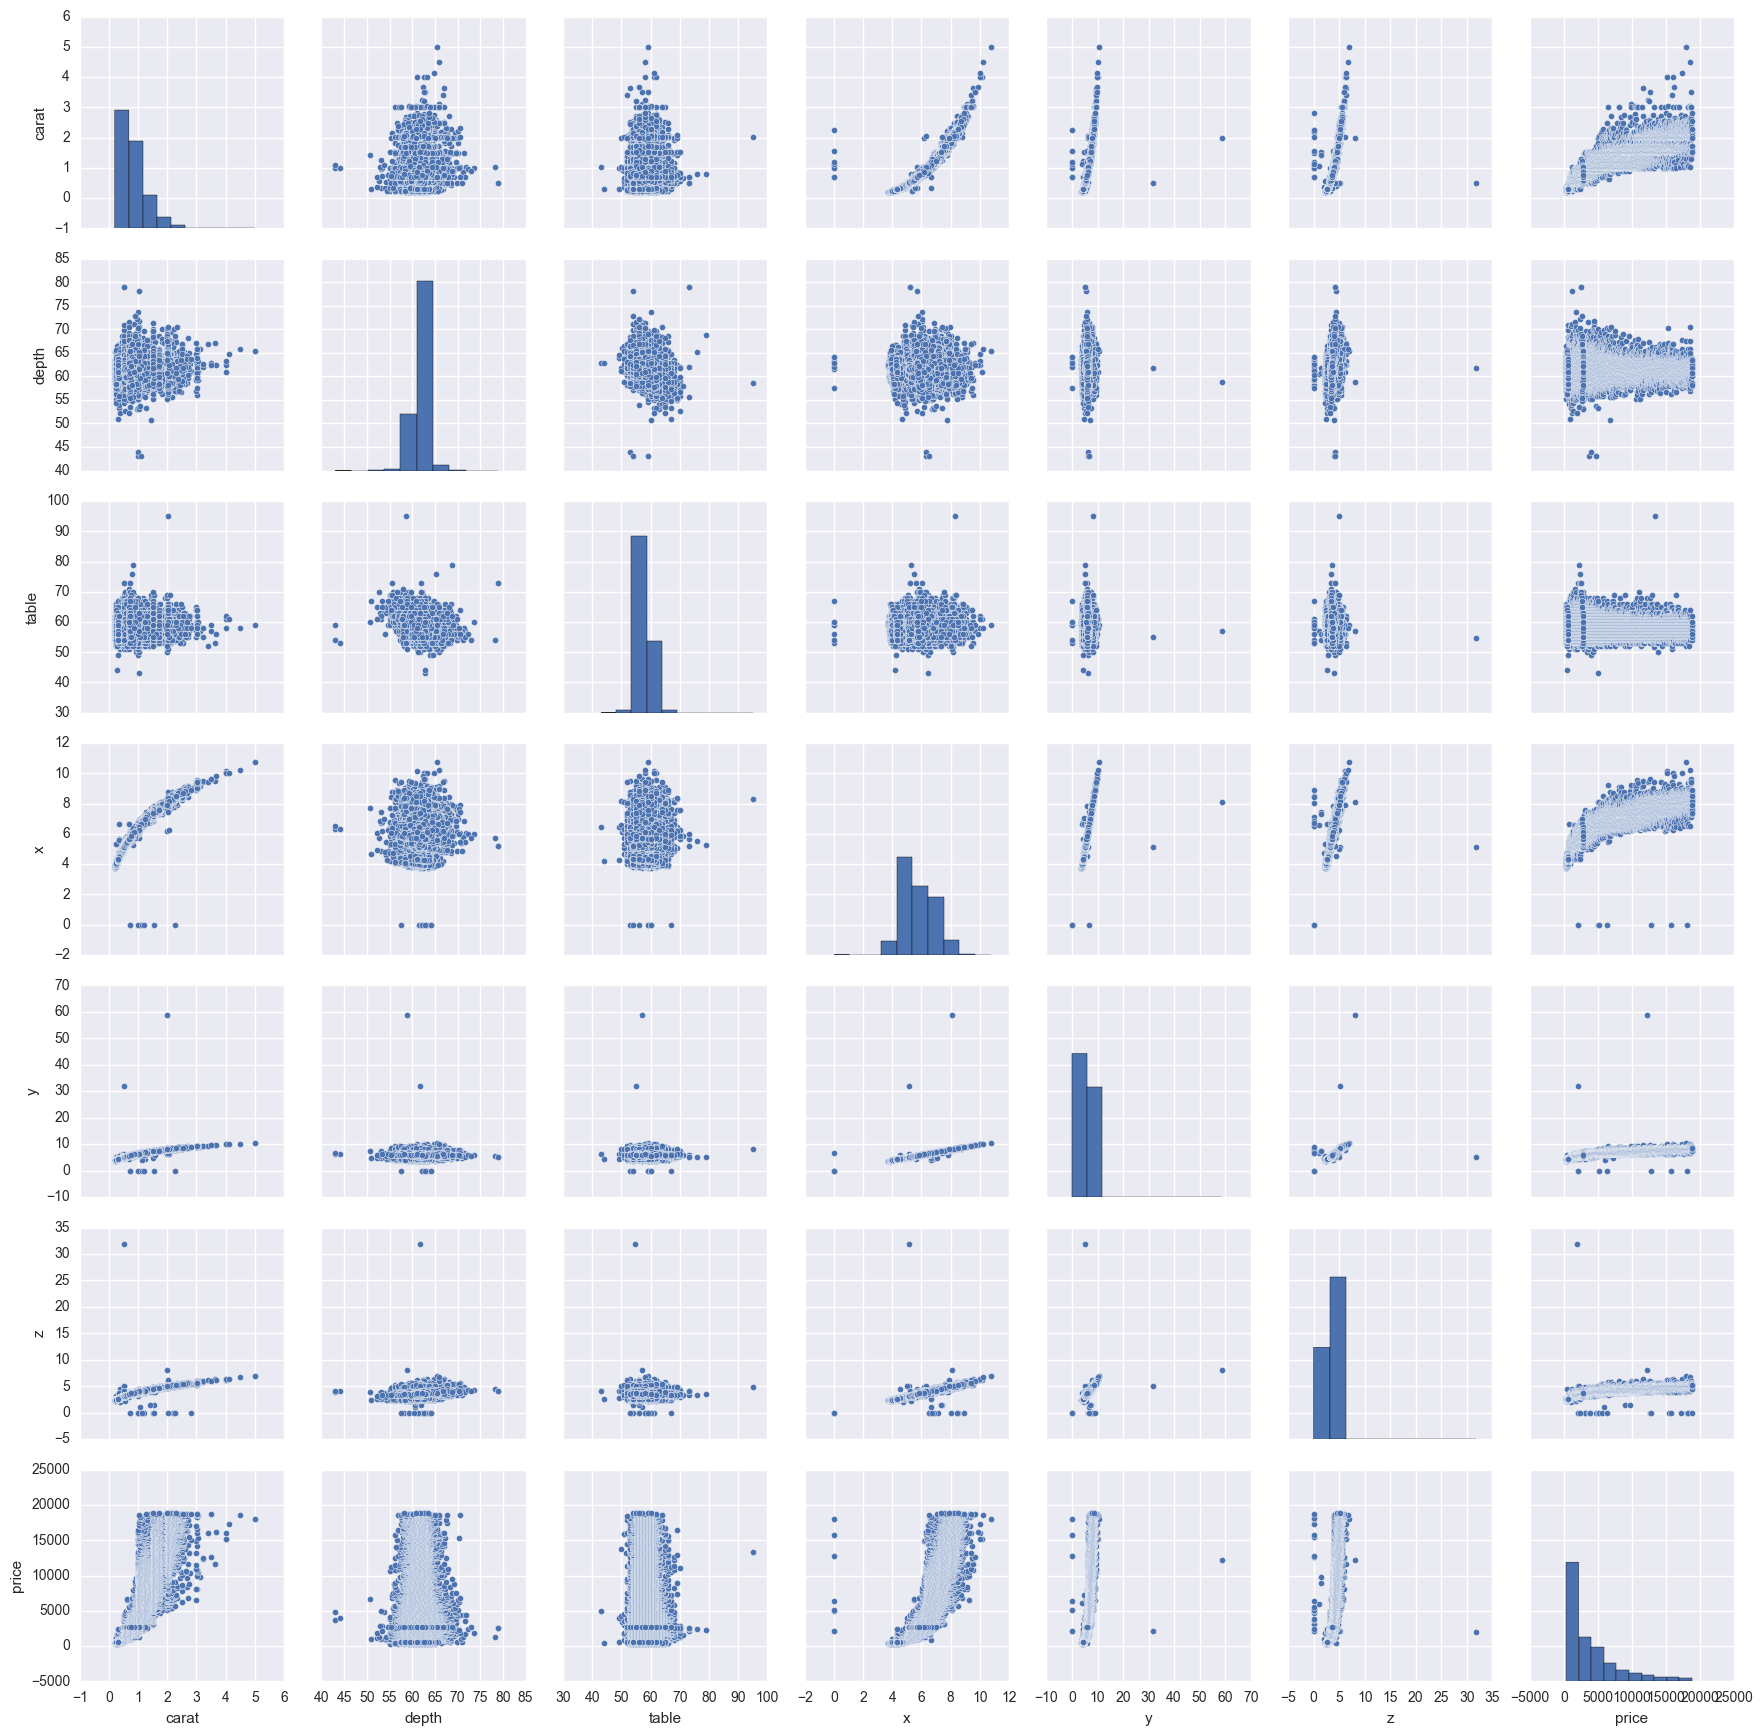

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(diamonds[["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"]])
plt.show()

The pair-plot can provide a guild for bivariate analysis. What we really care about here is price. We can see what might be relationships between price and clarity, and color, which we’ll keep in mind for later when we start modeling our data. Another fact we should pay attentin is that the weight of a diamond is a function of volume, and volume is a function of x * y * z, which suggests that we might be especially interested in the cubed-root of carat weight.

#### Price VS. Carat

Let’s re-plot the price-carat relationship, but now let’s put price on a log10 scale.

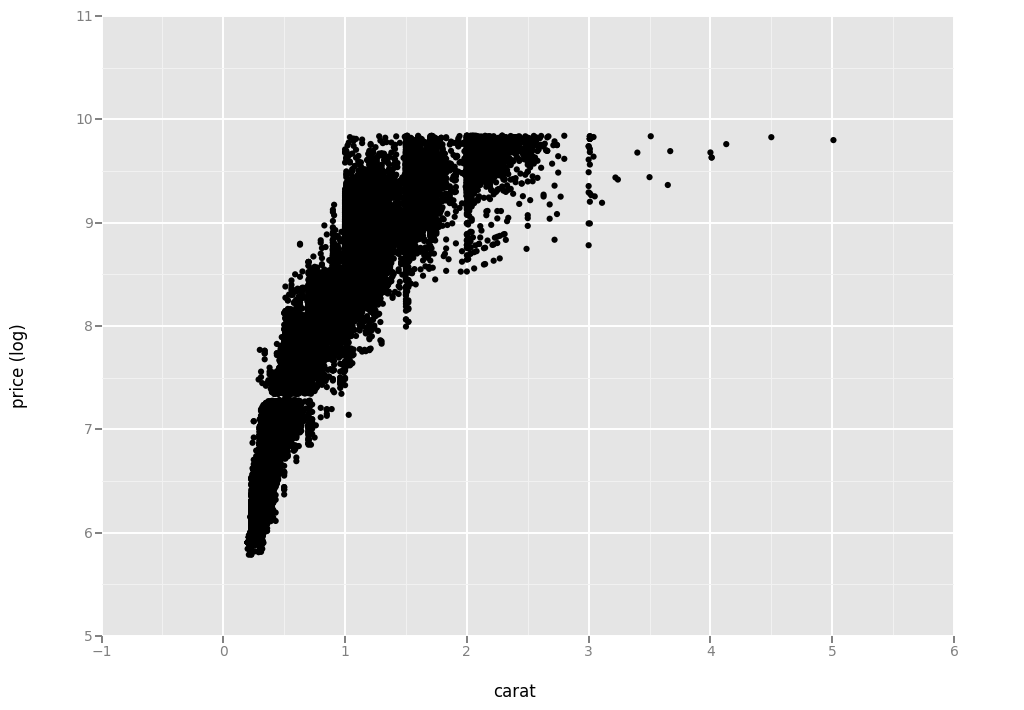

<ggplot: (-9223371894196278584)>

In [22]:
ggplot(aes(x='carat', y='pricelog'),data=diamonds)+\
    geom_point()+ylab('price (log)')

Looks better, though still a little funky - let’s try using use the cube-root of carat as we speculated about above.

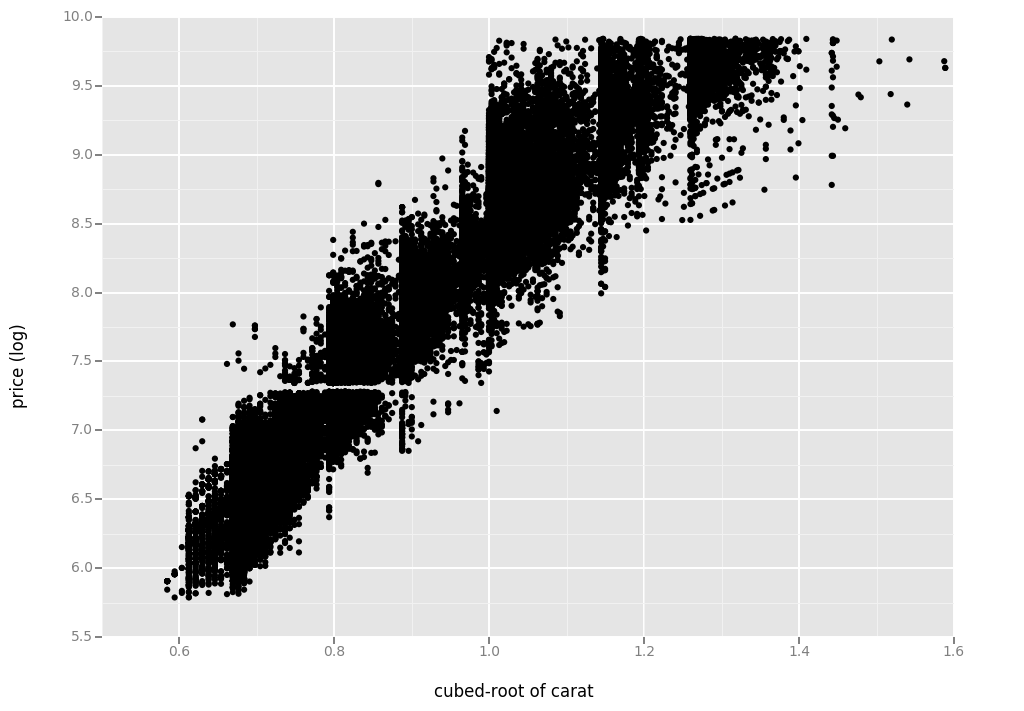

<ggplot: (177695345826)>

In [15]:
diamonds['carat_root3'] =  diamonds['carat'].apply(lambda x: pow(x,1.0/3))
ggplot(aes(x='carat_root3', y='pricelog'),data=diamonds)+\
    scale_x_continuous(limits = (0.5,1.6))+\
    scale_y_continuous(limits = (5.5,10))+\
    geom_point(position="jitter")+ylab('price (log)')+xlab('cubed-root of carat')

looks like an almost-linear relationship was found after applying the transformations to get the variables on a nice scale.

#### Using Color to Understand Qualitative Factors

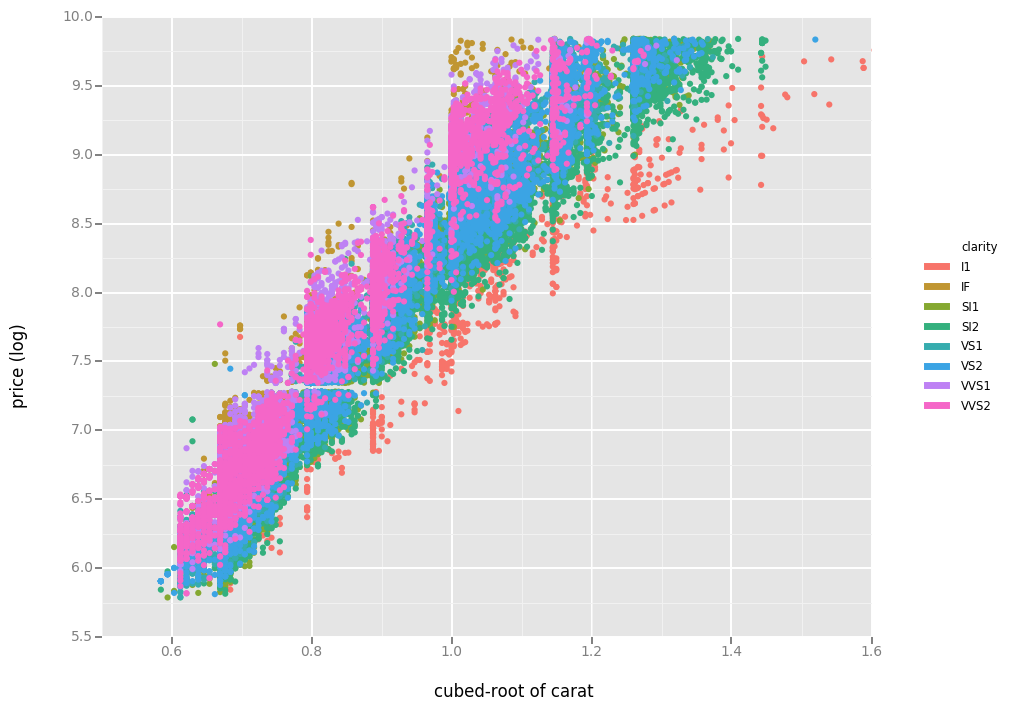

<ggplot: (177697546195)>

In [19]:

ggplot(aes(x='carat_root3', y='pricelog',color='clarity'),data=diamonds)+\
    scale_x_continuous(limits = (0.5,1.6))+\
    scale_y_continuous(limits = (5.5,10))+\
    geom_point(position="jitter")+ylab('price (log)')+xlab('cubed-root of carat')

As a background knowledge, the cut of a diamond has a much more consequential impact on that “fiery” quality that jewelers describe as the quintessential characteristic of a diamond. Clarity seems to explain an awful lot of the remaining variance in price when we visualize it as a color on the plot.

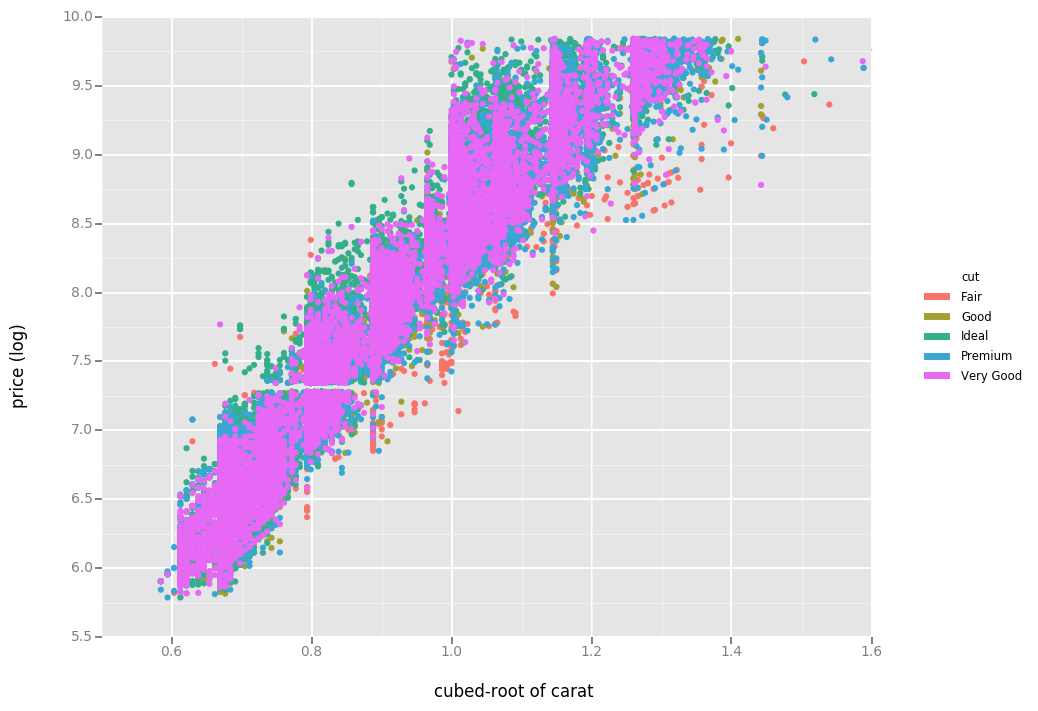

<ggplot: (-9223371859157173160)>

In [20]:
ggplot(aes(x='carat_root3', y='pricelog',color='cut'),data=diamonds)+\
    scale_x_continuous(limits = (0.5,1.6))+\
    scale_y_continuous(limits = (5.5,10))+\
    geom_point(position="jitter")+ylab('price (log)')+xlab('cubed-root of carat')

There isn't much variation of cut on the plot.

#### Build a model

At this point, we’ve got a pretty good idea of how we might model price.

In [23]:
# model 1
import statsmodels.formula.api as smf
m1 = smf.ols('pricelog~carat_root3',data=diamonds).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:               pricelog   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 6.520e+05
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:26:47   Log-Likelihood:                -7962.5
No. Observations:               53940   AIC:                         1.593e+04
Df Residuals:                   53938   BIC:                         1.595e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       2.8209      0.006    450.091      

In [24]:
# model 2
import statsmodels.formula.api as smf
m2 = smf.ols('pricelog~carat_root3+carat',data=diamonds).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:               pricelog   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 3.875e+05
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:29:48   Log-Likelihood:                -3631.3
No. Observations:               53940   AIC:                             7269.
Df Residuals:                   53937   BIC:                             7295.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       1.0388      0.019     53.899      

In [25]:
# model 3
import statsmodels.formula.api as smf
m3 = smf.ols('pricelog~carat_root3+carat+cut',data=diamonds).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:               pricelog   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.387e+05
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:30:42   Log-Likelihood:                -1837.4
No. Observations:               53940   AIC:                             3689.
Df Residuals:                   53933   BIC:                             3751.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.6851      0.020  

In [26]:
# model 4
import statsmodels.formula.api as smf
m4 = smf.ols('pricelog~carat_root3+carat+cut+color+clarity',data=diamonds).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:               pricelog   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.738e+05
Date:                Sat, 03 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:31:39   Log-Likelihood:                 34091.
No. Observations:               53940   AIC:                        -6.814e+04
Df Residuals:                   53920   BIC:                        -6.796e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -0.1719      0.011  